In [72]:
import geopandas as gpd
import pandas as pd 


# Lectura de datos
def load_geo_data(file_path):
    return gpd.read_file(file_path)

def read_data():
    provincias_geojson = load_geo_data('../data/provincias.geojson')
    cantones_geojson = load_geo_data('../data/cantones.geojson')
    parroquias_geojson = load_geo_data('../data/parroquias.geojson')

    resultados = pd.read_excel('../data/resultados.xlsx')
    return provincias_geojson,cantones_geojson,parroquias_geojson,resultados

# Transformaciones y obtencion de porcentajes
def generate_pivot(resultados,category):
    if category == 'PROVINCIA':
        pivot = resultados.pivot_table(index=[f'COD_{category}',f'NOM_{category}'],values='RESULTADOS',columns='NOM_CANDIDATO',aggfunc='sum').reset_index()
    elif category == 'CANTON':
        pivot = resultados.pivot_table(index=['COD_PROVINCIA',f'COD_{category}',f'NOM_{category}'],values='RESULTADOS',columns='NOM_CANDIDATO',aggfunc='sum').reset_index()
    elif category == 'PARROQUIA':
        pivot = resultados.pivot_table(index=['COD_PROVINCIA','COD_CANTON',f'COD_{category}',f'NOM_{category}'],values='RESULTADOS',columns='NOM_CANDIDATO',aggfunc='sum').reset_index()
    else:
        print('ERROR: Category Not Found')
        return None
    pivot['AUSENTISMO'] = pivot['ELECTORES'] - pivot['SUFRAGANTES']
    pivot['VALIDOS'] = pivot['SUFRAGANTES'] - pivot['BLANCO'] - pivot['NULO']
    # Calculo porcentajes

    pivot['P_ANDREA_GONZALEZ'] = ((pivot['ANDREA GONZALEZ']/pivot['VALIDOS'])*100).round(2)
    pivot['P_DANIEL_NOBOA'] = ((pivot['DANIEL NOBOA AZIN']/pivot['VALIDOS'])*100).round(2)
    pivot['P_LEONIDAS_IZA'] = ((pivot['LEONIDAS IZA']/pivot['VALIDOS'])*100).round(2)
    pivot['P_LUISA_GONZALEZ'] = ((pivot['LUISA GONZALEZ']/pivot['VALIDOS'])*100).round(2)
    pivot['P_OTROS'] = ((pivot['OTROS']/pivot['VALIDOS'])*100).round(2)
    pivot['P_BLANCO'] = ((pivot['BLANCO']/pivot['SUFRAGANTES'])*100).round(2)
    pivot['P_NULO'] = ((pivot['NULO']/pivot['SUFRAGANTES'])*100).round(2)
    pivot['P_AUSENTISMO'] = ((pivot['AUSENTISMO']/pivot['ELECTORES'])*100).round(2)
    return pivot

# 1. Leemos los geojson y los resultados
provincias_geojson,cantones_geojson,parroquias_geojson,resultados = read_data()
# 2. Definimos el degloce y generamos las tablas pivot

pivot_provincia = generate_pivot(resultados,'PROVINCIA')
pivot_canton = generate_pivot(resultados,'CANTON')
pivot_parroquia = generate_pivot(resultados,'PARROQUIA')


In [73]:
pivot_parroquia

NOM_CANDIDATO,COD_PROVINCIA,COD_CANTON,COD_PARROQUIA,NOM_PARROQUIA,ANDREA GONZALEZ,BLANCO,DANIEL NOBOA AZIN,ELECTORES,LEONIDAS IZA,LUISA GONZALEZ,...,AUSENTISMO,VALIDOS,P_ANDREA_GONZALEZ,P_DANIEL_NOBOA,P_LEONIDAS_IZA,P_LUISA_GONZALEZ,P_OTROS,P_BLANCO,P_NULO,P_AUSENTISMO
0,1,260,285,BAÑOS,805.0,312.0,7088.0,23452.0,1101.0,6624.0,...,5403.0,16333.0,4.93,43.40,6.74,40.56,4.32,1.73,7.78,23.04
1,1,260,730,CUMBE,122.0,112.0,1451.0,5461.0,458.0,1448.0,...,1388.0,3640.0,3.35,39.86,12.58,39.78,4.42,2.75,7.88,25.42
2,1,260,845,CHAUCHA / ANGAS,26.0,63.0,235.0,1298.0,108.0,448.0,...,292.0,860.0,3.02,27.33,12.56,52.09,5.00,6.26,8.25,22.50
3,1,260,860,CHECA JIDCAY,63.0,48.0,681.0,2830.0,107.0,531.0,...,1171.0,1449.0,4.35,47.00,7.38,36.65,4.49,2.89,9.76,41.38
4,1,260,905,CHIQUINTAD,128.0,84.0,1149.0,4191.0,219.0,963.0,...,1244.0,2593.0,4.94,44.31,8.45,37.14,5.09,2.85,9.16,29.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,28,341,9055,C. E. EN EL CAIRO,0.0,0.0,0.0,40.0,0.0,4.0,...,36.0,4.0,0.00,0.00,0.00,100.00,0.00,0.00,0.00,90.00
1299,28,351,9056,C. E. EN SANTO DOMINGO,8.0,2.0,145.0,602.0,26.0,91.0,...,318.0,275.0,2.91,52.73,9.45,33.09,1.82,0.70,2.46,52.82
1300,28,391,9061,C. E. EN MONTEVIDEO,4.0,1.0,52.0,251.0,10.0,19.0,...,156.0,91.0,4.40,57.14,10.99,20.88,6.59,1.05,3.16,62.15
1301,28,401,9062,C. E. EN CARACAS,NaN,NaN,NaN,10027.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
pivot_provincia

NOM_CANDIDATO,COD_PROVINCIA,NOM_PROVINCIA,ANDREA GONZALEZ,BLANCO,DANIEL NOBOA AZIN,ELECTORES,LEONIDAS IZA,LUISA GONZALEZ,NULO,OTROS,...,AUSENTISMO,VALIDOS,P_ANDREA_GONZALEZ,P_DANIEL_NOBOA,P_LEONIDAS_IZA,P_LUISA_GONZALEZ,P_OTROS,P_BLANCO,P_NULO,P_AUSENTISMO
0,1,AZUAY,21933,8775,206001,635167,29700,173148,37454,17710,...,140285,448653,4.89,45.92,6.62,38.59,3.95,1.77,7.57,22.09
1,2,BOLIVAR,3546,3997,65281,179381,23645,37832,11345,4204,...,29475,134564,2.64,48.51,17.57,28.11,3.12,2.67,7.57,16.43
2,3,CAÑAR,4043,3235,59415,194783,16064,45356,9984,4739,...,51888,129676,3.12,45.82,12.39,34.98,3.65,2.26,6.99,26.64
3,4,CARCHI,4064,2938,58084,150459,5063,46118,8318,4229,...,21566,117637,3.45,49.38,4.30,39.20,3.59,2.28,6.45,14.33
4,5,COTOPAXI,5820,6370,114512,394410,89280,84358,23151,10073,...,60722,304167,1.91,37.65,29.35,27.73,3.31,1.91,6.94,15.40
5,6,CHIMBORAZO,7674,6207,159103,421768,51740,75087,23596,11306,...,86962,305003,2.52,52.16,16.96,24.62,3.71,1.85,7.05,20.62
6,7,EL ORO,11086,8226,184192,552652,3986,206435,28549,14296,...,95751,420126,2.64,43.84,0.95,49.14,3.40,1.80,6.25,17.33
7,8,ESMERALDAS,4090,15856,123856,433155,3625,158781,31484,14203,...,81167,304648,1.34,40.66,1.19,52.12,4.66,4.50,8.94,18.74
8,9,GUAYAS,58279,57717,1083256,3238444,19135,1206292,188041,118353,...,506419,2486267,2.34,43.57,0.77,48.52,4.76,2.11,6.88,15.64
9,10,IMBABURA,7773,6099,116412,395165,41952,126307,23423,10577,...,62461,303182,2.56,38.40,13.84,41.66,3.49,1.83,7.04,15.81


In [55]:
import matplotlib.pyplot as plt
import geopandas as gpd
import streamlit as st

def plot_map(data_geojson, id_column, name_column, value_column, color_map, line_color='#F0F0F0', line_width=0.8, mostrar_nombres=True):
    """
    Función para generar mapas con datos geoespaciales y valores asociados.

    Parámetros:
    - data_geojson: GeoDataFrame con datos geoespaciales y valores a mapear.
    - id_column: Nombre de la columna que contiene los códigos únicos de las unidades geográficas.
    - name_column: Nombre de la columna con los nombres de las unidades geográficas.
    - value_column: Nombre de la columna con los valores a mapear (usado para color).
    - color_map: Diccionario que asigna colores a los valores del `value_column`.
    - line_color: Color del borde de los polígonos.
    - line_width: Ancho del borde de los polígonos.
    - mostrar_nombres: Booleano para indicar si se deben mostrar los nombres en el mapa.

    Retorna:
    - fig, ax: Figura y ejes de Matplotlib con el mapa generado.
    """
    fig, ax = plt.subplots()

    # Filtrar datos válidos con geometría
    data_to_plot = data_geojson.dropna(subset=['geometry'])

    # Dibujar los polígonos
    data_to_plot.plot(ax=ax, edgecolor=line_color, linewidth=line_width)

    # Anotaciones en los centroides
    for _, row in data_to_plot.iterrows():
        centroid = row.geometry.centroid
        text = f"{row[id_column]}\n{row[name_column]}" if mostrar_nombres else f"{row[id_column]}"
        ax.annotate(text=text, xy=(centroid.x, centroid.y),
                    xytext=(3, 3), textcoords="offset points",
                    ha='center', va='center', fontsize=4 if mostrar_nombres else 8, weight='bold')

    # Colorear el mapa según los valores
    data_to_plot.plot(ax=ax, linewidth=line_width,
                      color=[color_map.get(x, "#FFFFFF") for x in data_to_plot[value_column]],
                      edgecolor=line_color)

    # Configuración del gráfico
    ax.set_title("")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('none')
    fig.patch.set_alpha(0.0)
    for spine in ax.spines.values():
        spine.set_visible(False)

    return fig, ax


In [57]:
import pandas as pd

def assign_quintiles(series: pd.Series) -> pd.Series:
    """
    Asigna un número del 1 al 5 a cada valor de la serie dependiendo del quintil en el que se encuentre.
    """
    return pd.qcut(series, q=20, labels=[i+1 for i in range(20)])


final_provincias['Q_BLANCO'] = assign_quintiles(final_provincias['P_BLANCO'])
print(final_provincias)


    COD_PROVINCIA      NOM_PROVINCIA  ANDREA GONZALEZ  BLANCO  \
0               1              AZUAY            21933    8775   
1               2            BOLIVAR             3546    3997   
2               3              CAÑAR             4043    3235   
3               4             CARCHI             4064    2938   
4               5           COTOPAXI             5820    6370   
5               6         CHIMBORAZO             7674    6207   
6               7             EL ORO            11086    8226   
7               8         ESMERALDAS             4090   15856   
8               9             GUAYAS            58279   57717   
9              10           IMBABURA             7773    6099   
10             11               LOJA            12572    6493   
11             12           LOS RIOS             8833   24559   
12             13             MANABI            22386   42408   
13             14    MORONA SANTIAGO             2151    2985   
14             15        

In [58]:
import colorsys
import matplotlib.colors as mcolors

def generate_chroma_palette(hex_color, steps=20):
    """
    Generate an ascending chroma palette from a given hex color.
    
    Parameters:
        hex_color (str): The input color in hex format (e.g., '#3498db').
        steps (int): Number of colors to generate (default is 20).
        
    Returns:
        dict: A dictionary with step indices as keys and hex colors as values.
    """
    # Convert hex to RGB (0-1 scale)
    rgb = mcolors.hex2color(hex_color)
    
    # Convert RGB to HLS
    h, l, s = colorsys.rgb_to_hls(*rgb)
    
    # Generate colors with ascending lightness
    palette = {}
    for i in range(steps):
        new_l = min(1, l + (1 - l) * (i / (steps - 1)))  # Increase lightness gradually
        new_rgb = colorsys.hls_to_rgb(h, new_l, s)
        new_hex = mcolors.to_hex(new_rgb)
        palette[i] = new_hex
    
    return palette

BLANCO = "#4D4D4D"
# Example usage
hex_color = BLANCO
palette = generate_chroma_palette(hex_color)
print(palette)


{0: '#4d4d4d', 1: '#565656', 2: '#606060', 3: '#696969', 4: '#727272', 5: '#7c7c7c', 6: '#858585', 7: '#8f8f8f', 8: '#989898', 9: '#a1a1a1', 10: '#ababab', 11: '#b4b4b4', 12: '#bdbdbd', 13: '#c7c7c7', 14: '#d0d0d0', 15: '#dadada', 16: '#e3e3e3', 17: '#ececec', 18: '#f6f6f6', 19: '#ffffff'}


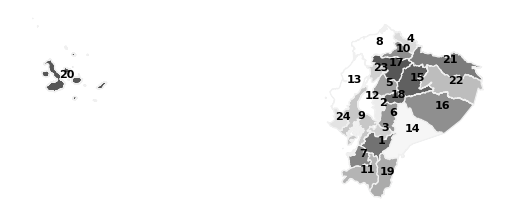

In [60]:
color_map_1 = palette
mostrar_nombres = False

fig, ax = plot_map(final_provincias, "COD_PROVINCIA", "NOM_PROVINCIA", "Q_BLANCO", color_map_1,mostrar_nombres=mostrar_nombres)
table = final_provincias[['COD_PROVINCIA', 'NOM_PROVINCIA', 'Q_BLANCO']].set_index('COD_PROVINCIA')

In [62]:
final_provincias

,COD_PROVINCIA,NOM_PROVINCIA,ANDREA GONZALEZ,BLANCO,DANIEL NOBOA AZIN,ELECTORES,LEONIDAS IZA,LUISA GONZALEZ,NULO,OTROS,...,dpa_provin,dpa_despro,dpa_valor,dpa_anio,rei_codigo,ren_codigo,pee_codigo,cod_prov,geometry,Q_BLANCO
0,1,AZUAY,21933,8775,206001,635167,29700,173148,37454,17710,...,01,AZUAY,0,2012,05,01,593,None,"MULTIPOLYGON (((-78.56954 -2.55865, -78.5692 -...",4
1,2,BOLIVAR,3546,3997,65281,179381,23645,37832,11345,4204,...,02,BOLIVAR,0,2012,02,01,593,None,"MULTIPOLYGON (((-78.86209 -1.1914, -78.86216 -...",17
2,3,CAÑAR,4043,3235,59415,194783,16064,45356,9984,4739,...,03,CAÑAR,0,2012,05,01,593,None,"MULTIPOLYGON (((-78.56954 -2.55865, -78.57007 ...",14
3,4,CARCHI,4064,2938,58084,150459,5063,46118,8318,4229,...,04,CARCHI,0,2012,04,01,593,None,"MULTIPOLYGON (((-78.49647 1.19776, -78.49573 1...",15
4,5,COTOPAXI,5820,6370,114512,394410,89280,84358,23151,10073,...,05,COTOPAXI,0,2012,02,01,593,None,"MULTIPOLYGON (((-78.42185 -0.71691, -78.42185 ...",9
5,6,CHIMBORAZO,7674,6207,159103,421768,51740,75087,23596,11306,...,06,CHIMBORAZO,0,2012,02,01,593,None,"MULTIPOLYGON (((-78.358 -1.52162, -78.358 -1.5...",8
6,7,EL ORO,11086,8226,184192,552652,3986,206435,28549,14296,...,07,EL ORO,0,2012,03,02,593,None,"MULTIPOLYGON (((-80.20645 -3.43884, -80.20748 ...",6
7,8,ESMERALDAS,4090,15856,123856,433155,3625,158781,31484,14203,...,08,ESMERALDAS,0,2012,04,02,593,None,"MULTIPOLYGON (((-79.90438 0.27876, -79.90431 0...",20
8,9,GUAYAS,58279,57717,1083256,3238444,19135,1206292,188041,118353,...,09,GUAYAS,0,2012,03,02,593,None,"MULTIPOLYGON (((-80.16401 -3.01416, -80.16472 ...",13
9,10,IMBABURA,7773,6099,116412,395165,41952,126307,23423,10577,...,10,IMBABURA,0,2012,04,01,593,None,"MULTIPOLYGON (((-77.81272 0.35677, -77.81255 0...",7


In [37]:
import colorsys
import matplotlib.colors as mcolors

def generate_chroma_palette(hex_color, steps=20):
    """
    Generate an ascending chroma palette from a given hex color.
    
    Parameters:
        hex_color (str): The input color in hex format (e.g., '#3498db').
        steps (int): Number of colors to generate (default is 20).
        
    Returns:
        dict: A dictionary with step indices as keys and hex colors as values.
    """
    # Convert hex to RGB (0-1 scale)
    rgb = mcolors.hex2color(hex_color)
    
    # Convert RGB to HLS
    h, l, s = colorsys.rgb_to_hls(*rgb)
    
    # Generate colors with ascending lightness
    palette = {}
    for i in range(steps):
        new_l = min(1, l + (1 - l) * (i / (steps - 1)))  # Increase lightness gradually
        new_rgb = colorsys.hls_to_rgb(h, new_l, s)
        new_hex = mcolors.to_hex(new_rgb)
        palette[i] = new_hex
    
    return palette

# Example usage
hex_color = "#04bbeb"
palette = generate_chroma_palette(hex_color)
print(palette)


{0: '#04bbeb', 1: '#04c6f9', 2: '#11cafb', 3: '#1fcdfb', 4: '#2dd0fb', 5: '#3bd4fc', 6: '#49d7fc', 7: '#57dafc', 8: '#65ddfc', 9: '#73e0fd', 10: '#81e3fd', 11: '#8fe6fd', 12: '#9de9fd', 13: '#abecfe', 14: '#b9effe', 15: '#c7f3fe', 16: '#d5f6fe', 17: '#e3f9ff', 18: '#f1fcff', 19: '#ffffff'}


In [ ]:
{0: '#04bbeb', 1: '#04c6f9', 2: '#11cafb', 3: '#1fcdfb', 4: '#2dd0fb', 5: '#3bd4fc', 6: '#49d7fc', 7: '#57dafc', 8: '#65ddfc', 9: '#73e0fd', 10: '#81e3fd', 11: '#8fe6fd', 12: '#9de9fd', 13: '#abecfe', 14: '#b9effe', 15: '#c7f3fe', 16: '#d5f6fe', 17: '#e3f9ff', 18: '#f1fcff', 19: '#ffffff'}

In [ ]:
RC = "#04bbeb"
ADN = "#6e328a"
PSP = "#008001"
PACHAKUTIK = "#eac102"
BLANCO = "#4D4D4D"
NULO = "#e96f2d"
AUSENTISMO = "#4b3b2a"
#b20000


In [38]:
final_provincias

,NOM_PROVINCIA,COD_PROVINCIA,ANDREA GONZALEZ,BLANCO,DANIEL NOBOA AZIN,ELECTORES,LEONIDAS IZA,LUISA GONZALEZ,NULO,OTROS,...,dpa_provin,dpa_despro,dpa_valor,dpa_anio,rei_codigo,ren_codigo,pee_codigo,cod_prov,geometry,C_BLANCO
0,AZUAY,1,21933,8775,206001,635167,29700,173148,37454,17710,...,01,AZUAY,0,2012,05,01,593,None,"MULTIPOLYGON (((-78.56954 -2.55865, -78.5692 -...",4
1,BOLIVAR,2,3546,3997,65281,179381,23645,37832,11345,4204,...,02,BOLIVAR,0,2012,02,01,593,None,"MULTIPOLYGON (((-78.86209 -1.1914, -78.86216 -...",2
2,CARCHI,4,4064,2938,58084,150459,5063,46118,8318,4229,...,04,CARCHI,0,2012,04,01,593,None,"MULTIPOLYGON (((-78.49647 1.19776, -78.49573 1...",2
3,CAÑAR,3,4043,3235,59415,194783,16064,45356,9984,4739,...,03,CAÑAR,0,2012,05,01,593,None,"MULTIPOLYGON (((-78.56954 -2.55865, -78.57007 ...",2
4,CHIMBORAZO,6,7674,6207,159103,421768,51740,75087,23596,11306,...,06,CHIMBORAZO,0,2012,02,01,593,None,"MULTIPOLYGON (((-78.358 -1.52162, -78.358 -1.5...",3
5,COTOPAXI,5,5820,6370,114512,394410,89280,84358,23151,10073,...,05,COTOPAXI,0,2012,02,01,593,None,"MULTIPOLYGON (((-78.42185 -0.71691, -78.42185 ...",3
6,EL ORO,7,11086,8226,184192,552652,3986,206435,28549,14296,...,07,EL ORO,0,2012,03,02,593,None,"MULTIPOLYGON (((-80.20645 -3.43884, -80.20748 ...",4
7,ESMERALDAS,8,4090,15856,123856,433155,3625,158781,31484,14203,...,08,ESMERALDAS,0,2012,04,02,593,None,"MULTIPOLYGON (((-79.90438 0.27876, -79.90431 0...",5
8,GALAPAGOS,20,635,215,8834,22603,590,5292,882,693,...,20,GALAPAGOS,0,2012,03,04,593,None,"MULTIPOLYGON (((-89.66637 -1.34547, -89.66625 ...",1
9,GUAYAS,9,58279,57717,1083256,3238444,19135,1206292,188041,118353,...,09,GUAYAS,0,2012,03,02,593,None,"MULTIPOLYGON (((-80.16401 -3.01416, -80.16472 ...",5


In [80]:
import pandas as pd
import numpy as np

def asignar_categoria(series):
    """
    Asigna valores del 1 al 20 según el porcentaje en la serie.
    """
    return np.ceil(series / 5).astype(int)

# Ejemplo de datos
data = {'Porcentaje': [3.45, 6.42, 15.6, 78.3, 99.9, 50]}
df = pd.DataFrame(data)

# Aplicar la función
df['Categoria'] = asignar_categoria(df['Porcentaje'])

# Mostrar el resultado
df

,Porcentaje,Categoria
0,3.45,1
1,6.42,2
2,15.60,4
3,78.30,16
4,99.90,20
5,50.00,10


In [82]:
cantones_geojson = load_geo_data('../data/cantones.geojson')
cantones_geojson

,gid,dpa_valor,dpa_anio,dpa_canton,dpa_descan,dpa_provin,dpa_despro,cod_prov,cod_cant,COD_PROVINCIA,COD_CANTON,geometry
0,1,0,2012,0201,GUARANDA,02,BOLIVAR,None,None,2,165,"MULTIPOLYGON (((-79.10549 -1.15052, -79.10508 ..."
1,2,0,2012,0202,CHILLANES,02,BOLIVAR,None,None,2,180,"MULTIPOLYGON (((-79.01751 -1.8641, -79.01741 -..."
2,3,0,2012,0203,CHIMBO,02,BOLIVAR,None,None,2,170,"MULTIPOLYGON (((-79.10213 -1.60866, -79.10174 ..."
3,4,0,2012,0204,ECHEANDIA,02,BOLIVAR,None,None,2,185,"MULTIPOLYGON (((-79.19709 -1.47405, -79.19688 ..."
4,5,0,2012,0205,SAN MIGUEL,02,BOLIVAR,None,None,2,175,"MULTIPOLYGON (((-79.00677 -1.68691, -79.00677 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
219,222,0,2012,1114,PINDAL,11,LOJA,None,None,11,730,"MULTIPOLYGON (((-80.13218 -4.02787, -80.13193 ..."
220,223,0,2012,0702,ARENILLAS,07,EL ORO,None,None,7,375,"MULTIPOLYGON (((-80.21609 -3.50031, -80.21535 ..."
221,224,0,2012,0707,HUAQUILLAS,07,EL ORO,None,None,7,695,"MULTIPOLYGON (((-80.20645 -3.43884, -80.20748 ..."
222,56,0,2012,1705,RUMIÑAHUI,17,PICHINCHA,None,None,17,80,"MULTIPOLYGON (((-78.45919 -0.29752, -78.45911 ..."


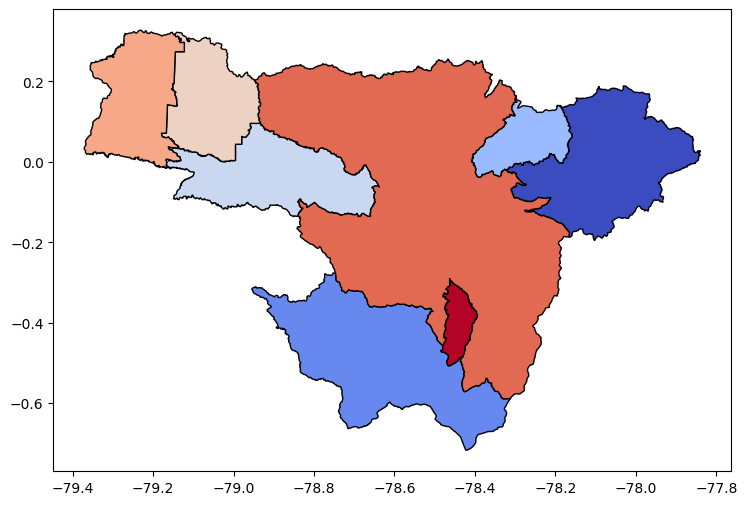

In [85]:
# Graficar el GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 6))
cantones_geojson_f = cantones_geojson[cantones_geojson['COD_PROVINCIA']==17]
cantones_geojson_f.plot(ax=ax, edgecolor='black', cmap='coolwarm')

# Mostrar el gráfico
plt.show()

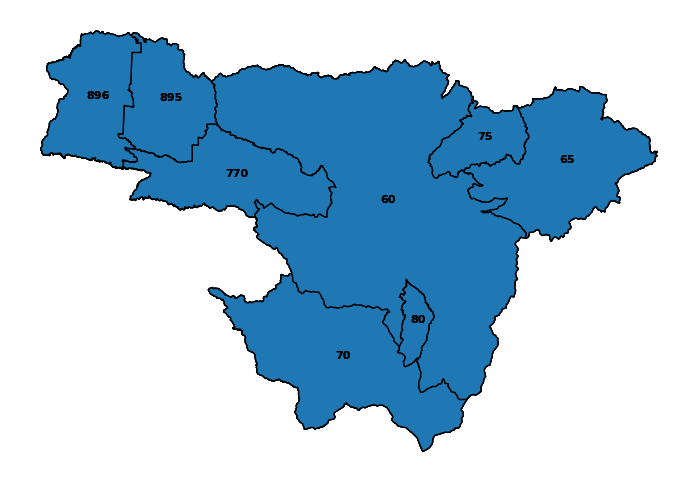

In [88]:
cantones_geojson_f.plot(ax=ax, edgecolor='#000000', linewidth=1,aspect=1)

# Anotaciones en los centroides
for _, row in cantones_geojson_f.iterrows():
    centroid = row.geometry.centroid
    text = f"{row['COD_CANTON']}\n{row['NOM_CANTON']}" if mostrar_nombres else f"{row['COD_CANTON']}"
    ax.annotate(text=text, xy=(centroid.x, centroid.y),
                xytext=(3, 3), textcoords="offset points",
                ha='center', va='center', fontsize=4 if mostrar_nombres else 8, weight='bold')

# Colorear el mapa según los valores
cantones_geojson_f.plot(ax=ax, linewidth=1,
                    #color=[color_map.get(x, "#FFFFFF") for x in cantones_geojson_f['COD_CANTON']],
                    edgecolor='#000000')

# Configuración del gráfico
ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('none')
fig.patch.set_alpha(0.0)
for spine in ax.spines.values():
    spine.set_visible(False)

fig